In [1]:
import pandas as pd
import numpy as np
import scipy as stats
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')
df

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,0,21,Wiraswasta,242912,SMA,9,Belum Pernah Menikah,Servis Lainnya,Perempuan,0.0,0.0,35.0,<=7jt
1,1,49,Wiraswasta,140782,10th,6,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,40.0,<=7jt
2,2,44,Wiraswasta,120057,D3,12,Menikah,Ekesekutif Managerial,Laki2,61404000.0,0.0,45.0,>7jt
3,3,24,Wiraswasta,194630,Sarjana,13,Belum Pernah Menikah,Spesialis,Laki2,0.0,0.0,35.0,<=7jt
4,4,33,Wiraswasta,219619,Master,14,Menikah,Spesialis,Laki2,210336000.0,0.0,40.0,>7jt
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35989,35989,47,Pekerja Bebas Bukan Perusahan,148169,SMA,9,Menikah,Perbaikan Kerajinan,Laki2,0.0,0.0,40.0,<=7jt
35990,35990,69,Pekerja Bebas Perusahaan,264722,D3,12,Menikah,Sales,Laki2,0.0,0.0,40.0,>7jt
35991,35991,24,Pekerja Bebas Bukan Perusahan,31606,Sarjana,13,Menikah,Spesialis,Perempuan,0.0,0.0,20.0,>7jt
35992,35992,47,Wiraswasta,197836,SMA,9,Menikah,Sales,Laki2,0.0,0.0,45.0,<=7jt


In [2]:
kelaspekerja_code = pd.get_dummies(df['Kelas Pekerja'])
pekerjaan_code = pd.get_dummies(df['Pekerjaan'])
pendidikan_code =pd.get_dummies(df['Pendidikan'])
statusperkawinan_code = pd.get_dummies(df['Status Perkawinan'])
jeniskelamin_code = pd.get_dummies(df['Jenis Kelamin'])

In [4]:
df_dropped = df.drop(['id','Kelas Pekerja', 'Pekerjaan','Pendidikan','Status Perkawinan','Jenis Kelamin'], axis = 1) 

In [5]:
df_fit = pd.concat([df_dropped,kelaspekerja_code,pekerjaan_code,pendidikan_code,statusperkawinan_code,jeniskelamin_code],axis='columns')

In [34]:
df_fit

,Umur,Berat Akhir,Jmlh Tahun Pendidikan,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji,?,Pekerja Bebas Bukan Perusahan,Pekerja Bebas Perusahaan,...,Sarjana,Sekolah Professional,Belum Pernah Menikah,Berpisah,Cerai,Janda,Menikah,Menikah LDR,Laki2,Perempuan
0,21,242912,9,0.0,0.0,35.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,49,140782,6,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,44,120057,12,61404000.0,0.0,45.0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,24,194630,13,0.0,0.0,35.0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
4,33,219619,14,210336000.0,0.0,40.0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35989,47,148169,9,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
35990,69,264722,12,0.0,0.0,40.0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
35991,24,31606,13,0.0,0.0,20.0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,1
35992,47,197836,9,0.0,0.0,45.0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [6]:
df_fit['Gaji'] = df_fit['Gaji'].replace(['<=7jt','>7jt'],('0','1'))

In [7]:
X = df_fit.drop('Gaji',axis=1)
y = df_fit['Gaji']

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [18]:
model = DecisionTreeClassifier()
tree_para = {'criterion': ['gini', 'entropy'], 'splitter':['best','random'], 'max_depth':np.arange(3,15)}
gscv=GridSearchCV(model, param_grid=tree_para, scoring='accuracy', cv=10)
gscv.fit(X,y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [19]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 9, 'splitter': 'best'}

In [20]:
model_tree = DecisionTreeClassifier(criterion = 'gini',max_depth=9, splitter = 'best')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [23]:
model_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9)

In [24]:
y_predict = model_tree.predict(X_test)

In [25]:
accuracy_score(y_test, y_predict)

0.8596510723413713

In [26]:
data = pd.read_csv('test.csv')

In [66]:
kelaspekerja = pd.get_dummies(data['Kelas Pekerja'])
pekerjaan= pd.get_dummies(data['Pekerjaan'])
pendidikan =pd.get_dummies(data['Pendidikan'])
statusperkawinan = pd.get_dummies(data['Status Perkawinan'])
jeniskelamin = pd.get_dummies(data['Jenis Kelamin'])

data_dropped = data.drop(['id','Kelas Pekerja', 'Pekerjaan','Pendidikan','Status Perkawinan','Jenis Kelamin'], axis = 1)

data_fit = pd.concat([data_dropped,kelaspekerja,pekerjaan,pendidikan,statusperkawinan,jeniskelamin],axis='columns')
data_fit

,Umur,Berat Akhir,Jmlh Tahun Pendidikan,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,?,Pekerja Bebas Bukan Perusahan,Pekerja Bebas Perusahaan,Pemerintah Lokal,...,Sarjana,Sekolah Professional,Belum Pernah Menikah,Berpisah,Cerai,Janda,Menikah,Menikah LDR,Laki2,Perempuan
0,30,99761,11,0.0,0.0,40.0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,28,202206,9,0.0,0.0,50.0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,34,199934,10,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,51,373448,10,0.0,28028000.0,40.0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,20,144685,10,0.0,22428000.0,40.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9594,58,159021,5,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
9595,45,144086,7,0.0,0.0,50.0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
9596,20,238685,10,0.0,0.0,32.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9597,41,249039,9,0.0,0.0,40.0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [29]:
model_tree.fit(X,y)

y_data = model_tree.predict(data_fit)

In [33]:
submission = pd.DataFrame({'id':data.id, 'Gaji':y_data})
submission

,id,Gaji
0,35994,0
1,35995,0
2,35996,0
3,35997,0
4,35998,0
...,...,...
9594,45588,0
9595,45589,0
9596,45590,0
9597,45591,0


In [31]:
submission.to_csv('submission.csv', index=False)

### My Machine Learning prediction score is 0.84026

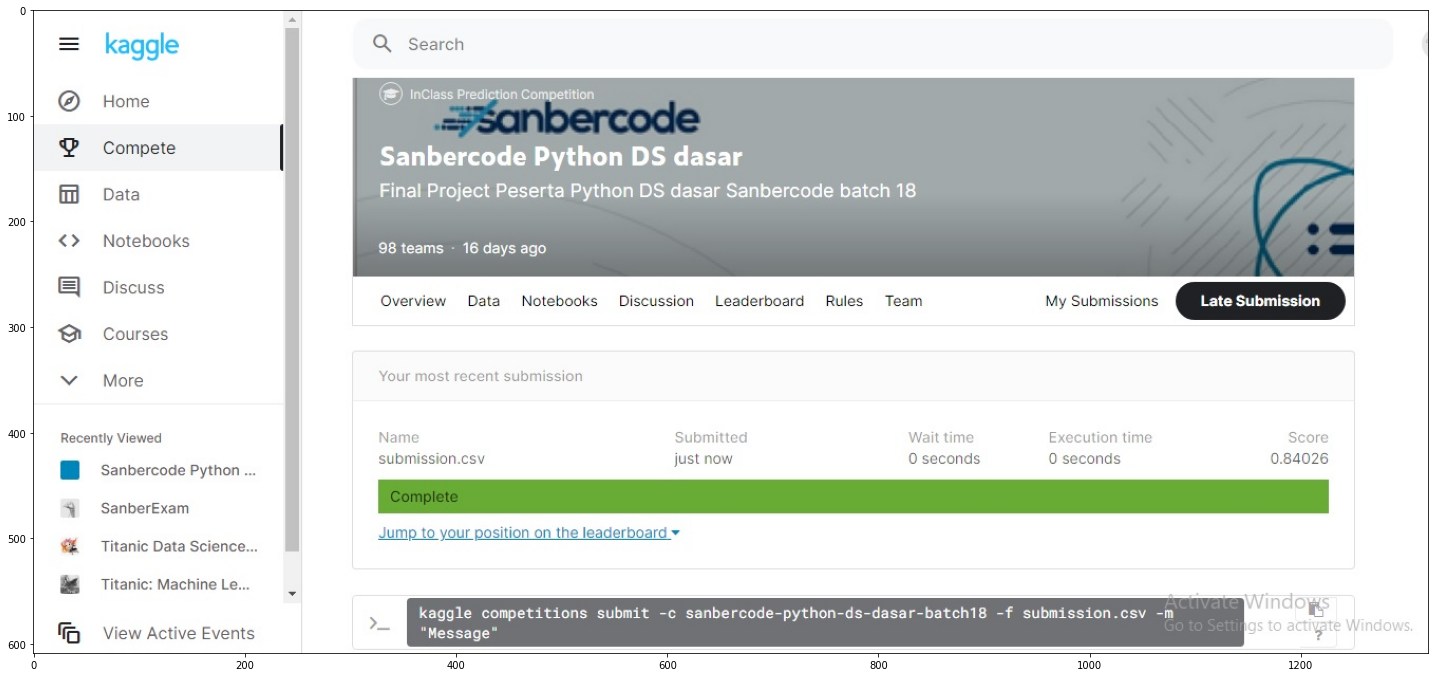

In [65]:
import matplotlib.image as mpimg
img = mpimg.imread('Score.jpg')

fig, ax = plt.subplots(figsize=(25,25))
imgplot = plt.imshow(img)